In [ ]:
""" Problem Statement:
Implement K-Nearest Neighbours algorithm on diabetes.csv dataset. Compute confusion
matrix, accuracy, error rate, precision and recall on the given dataset."""

' Problem Statement:\nImplement K-Nearest Neighbours algorithm on diabetes.csv dataset. Compute confusion\nmatrix, accuracy, error rate, precision and recall on the given dataset.'

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
# Suppress FutureWarnings from pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/sample_data/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Drop irrelevant columns if they exist
columns_to_drop = ['Pregnancies', 'BloodPressure', 'SkinThickness']
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop only existing columns
df.drop(existing_columns, axis=1, inplace=True)

# Replace 0 with NaN and then fill with mean
columns = ['Glucose', 'Insulin', 'BMI']
df[columns] = df[columns].replace(0, np.NaN)

for col in columns:
    df[col].fillna(df[col].mean(), inplace=True)


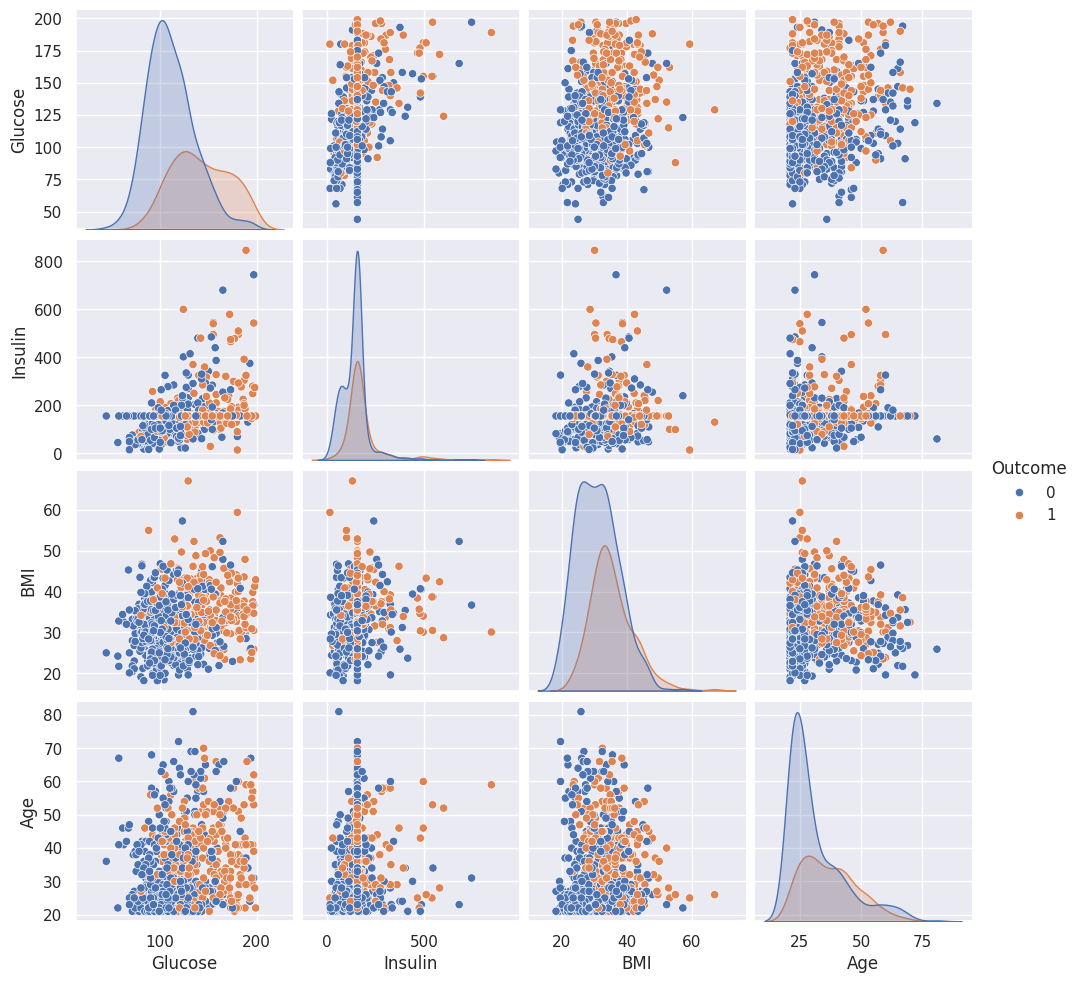

In [ ]:
# Plot pairwise relationships
graph = ['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
sns.set()
sns.pairplot(df[graph], hue='Outcome', diag_kind='kde')
plt.show()


In [ ]:
# Separate features and target variable
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize and fit KNN classifier
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Predictions
y_pred = classifier.predict(X_test)


In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[93 14]
 [14 33]]
F1 Score: 0.7021276595744681
Accuracy: 0.8181818181818182


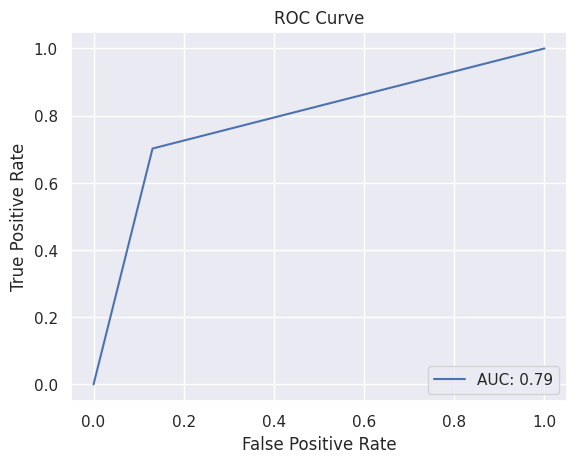

In [ ]:
# ROC curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
temp = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label="AUC: %.2f" % temp)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()


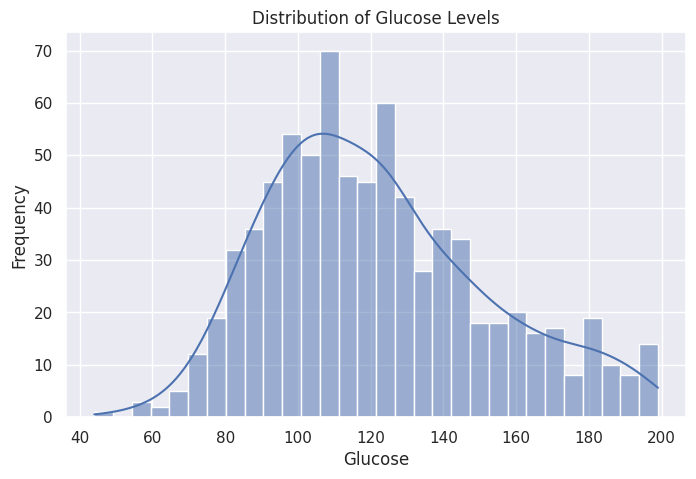

In [ ]:
# Histogram for Glucose levels
plt.figure(figsize=(8, 5))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()


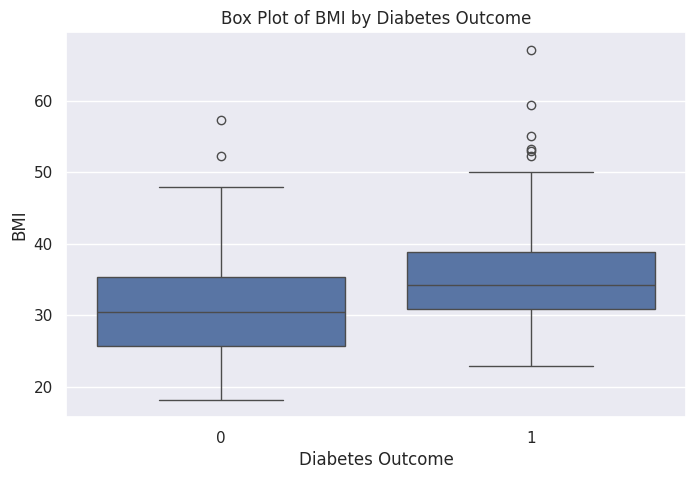

In [ ]:
# Box plot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('Box Plot of BMI by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.show()


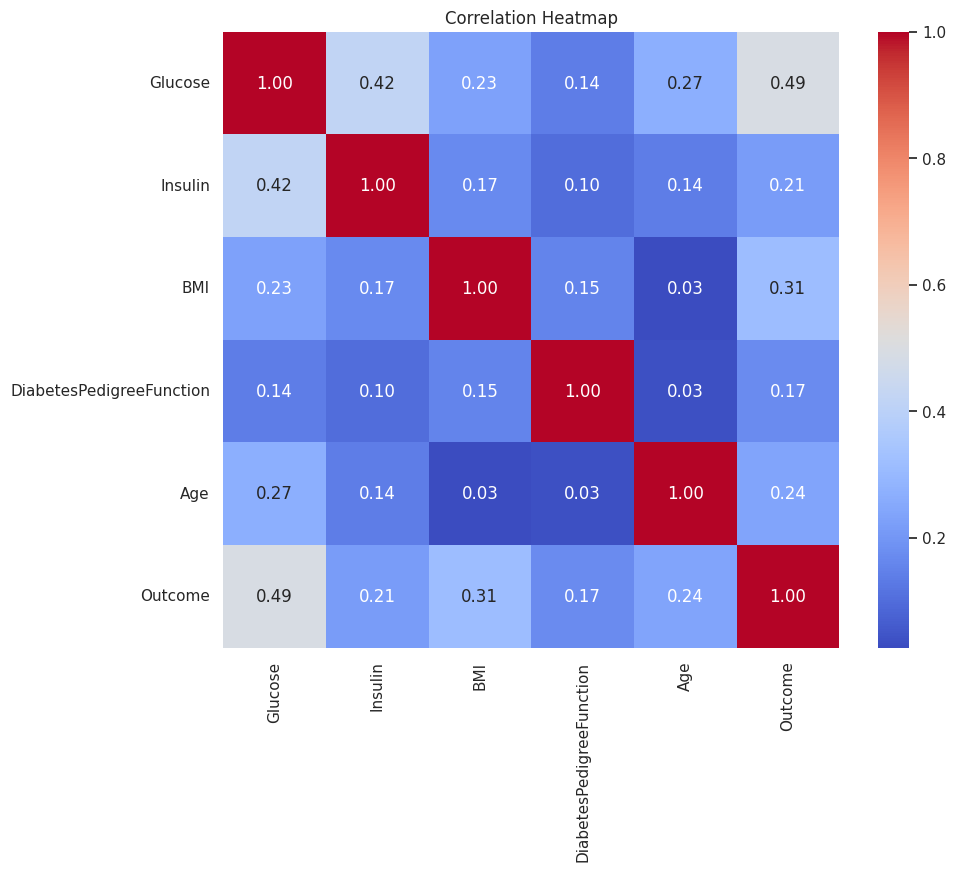

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


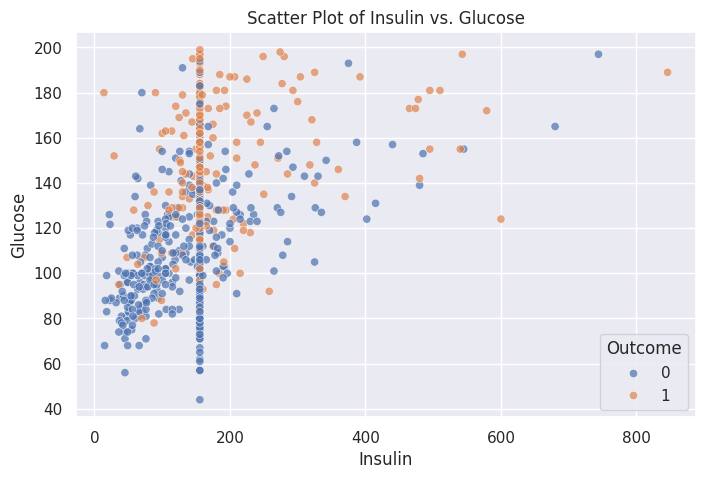

In [ ]:
# Scatter plot for Insulin vs. Glucose
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Insulin', y='Glucose', hue='Outcome', data=df, alpha=0.7)
plt.title('Scatter Plot of Insulin vs. Glucose')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()


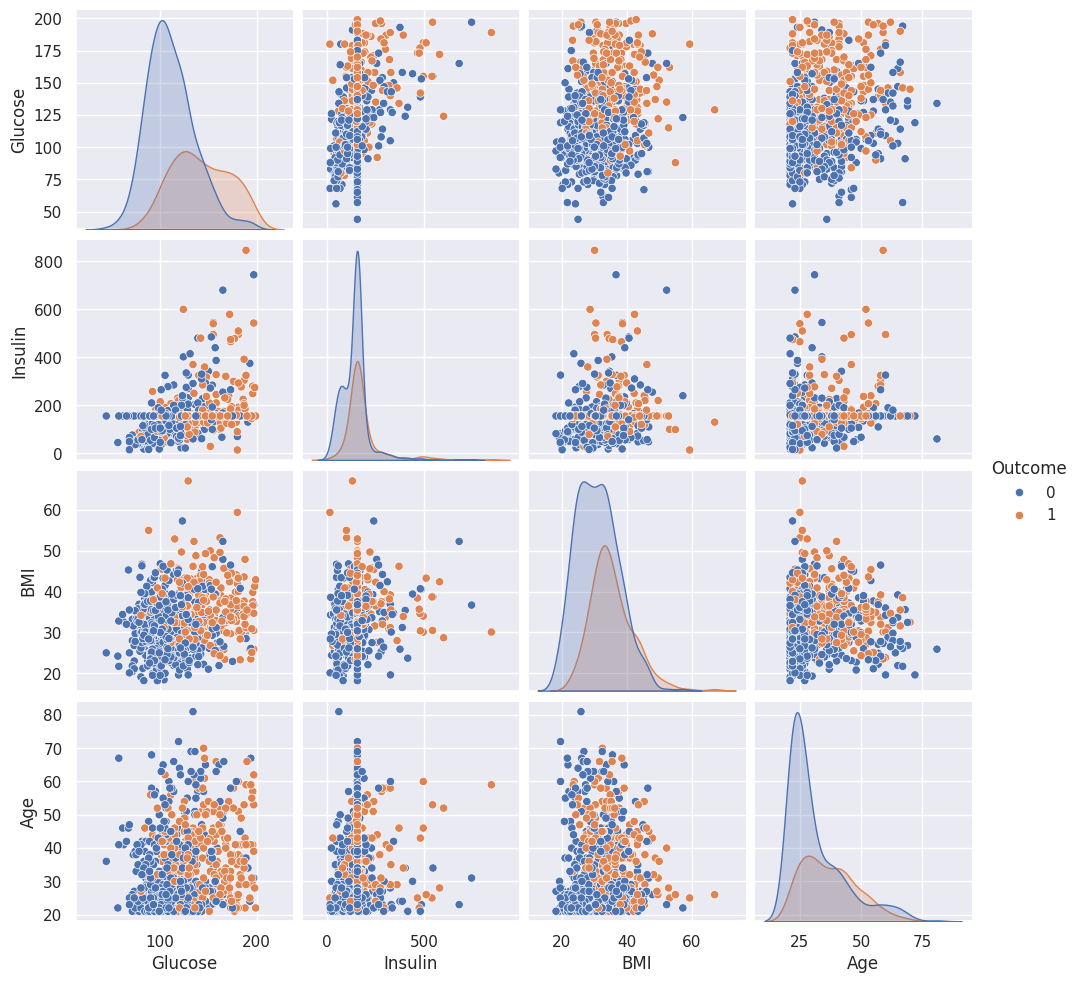

In [ ]:
# Pair plot (already included)
sns.set()
sns.pairplot(df[graph], hue='Outcome', diag_kind='kde')
plt.show()
